<a href="https://colab.research.google.com/github/nevetto/Churn_Modelling/blob/main/Churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# Import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Divide the data set to dependent and independent feature
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# New Section

In [ ]:
# Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
# concate these variables wit dataset
X=X.drop(['Geography', 'Gender'], axis=1)


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
# Splitting the dataset into Training set and Testing Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# Creating the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout 

In [ ]:
# Lets initialize the ANN
classifier = Sequential()

In [ ]:
# Adding the input Layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
# Adding the output hidden layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
# this function is for default adam optimizer
# classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# This is to implement my own Optmizer learning rate
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# EarlyStopping. to get the folowing code go to browser and find earlystopping keras in documentation
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
# Training the neural network
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4801 - accuracy: 0.7949 - val_loss: 0.4262 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4283 - accuracy: 0.8016 - val_loss: 0.4166 - val_accuracy: 0.8183


In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

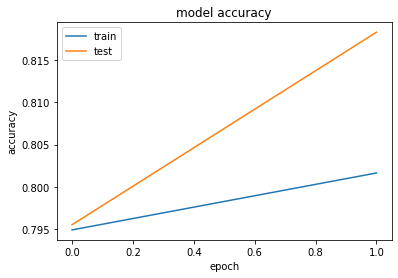

In [ ]:
# sumarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

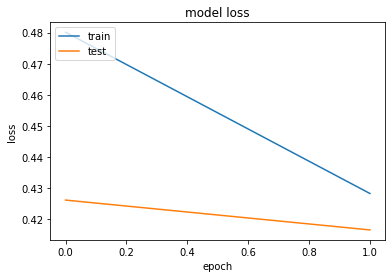

In [ ]:
# ploting for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# making predictions and evaluating the model

# predict the test set result

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1573,   22],
       [ 308,   97]])

In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.835

In [ ]:
# get the weights
classifier.get_weights()

[array([[-0.05252478,  0.25539592,  0.1696586 , -0.2559925 , -0.13501057,
         -0.00975291,  0.22080015, -0.33014253,  0.14396611, -0.03291089,
          0.03148907],
        [-0.19385761, -0.7687873 , -0.9510562 ,  0.6197469 ,  0.6796939 ,
          0.04001114,  0.07797095,  0.16811672, -0.9378885 , -1.4136585 ,
         -0.7762658 ],
        [ 0.0911189 , -0.28368586, -0.10682386,  0.50166535,  0.04136007,
          0.00155267,  0.68561494,  0.6607951 , -0.26620492, -0.12824453,
         -0.10698656],
        [ 0.40314183, -0.21458866, -0.44307876,  0.09707914, -0.14713642,
          0.62094957,  0.04037246, -0.16299109, -0.11946079,  0.42122695,
         -0.09617977],
        [ 1.1001114 , -0.23982412,  0.08005612,  0.8496319 , -1.2540159 ,
          1.0705409 , -0.35489136, -0.20042826, -0.03664899, -0.06460268,
          0.76329154],
        [ 0.02058151,  0.37978452,  0.04236634,  0.11119777, -0.00709587,
          0.05975776, -0.1860377 , -0.45828202,  0.08152281,  0.0068535